<h3>

Make new Product Recommendations


Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.


Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) 

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


o The repository has several datasets. For this case study, please use the Electronics dataset.

o The host page has several pointers to scripts and other examples that can help with parsing the datasets.

o The data set consists of:

    ● 7,824,482 Ratings (1-5) for Electronics products.
    ● Other metadata about products. Please see the description of the fields available on the web page cited above.


o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating

o Save these to a tab separated file. Name this file as product_ratings.csv.

## 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

#### Import packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
import warnings; warnings.simplefilter('ignore')

In [6]:
import Recommenders as Recommenders
import Evaluation as Evaluation

### Load dataset

In [7]:
prod = pd.read_csv("ratings_Electronics.csv")
prod.columns = ['user_id', 'product_id', 'rating','timestramp']

### Print the first 5 rows of the dataframe

In [8]:
prod.head()

,user_id,product_id,rating,timestramp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


### Observation : There are four columns with attributes User_id, Product_id, Rating and Timestramp

In [9]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
user_id       object
product_id    object
rating        float64
timestramp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


### Find null values in the dataset

In [10]:
missing_values=prod.columns[prod.isnull().any()]
prod[missing_values].isnull().sum()

Series([], dtype: float64)

### Observation: There are no null values in this dataset

### Find the unique number of users in the dataset

In [11]:
len(prod.user_id.value_counts())

4201696

## 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [12]:
counts = prod['user_id'].value_counts()
counts_50 = counts[counts >= 50].index

prod_new = prod[prod['user_id'].isin(counts_50)] 
prod_new.shape

(125871, 4)

In [13]:
print("No of unique users : ", len(prod_new['user_id'].unique()))
print("No of unique product : ", len(prod_new['product_id'].unique()))

No of unique users :  1540
No of unique product :  48190


### Observation :  The number of unique users who have rated 50 or more products are 1540

### Check for duplicate values 

In [14]:
duplicate = prod_new.duplicated(subset=['user_id','product_id'], keep='first')
duplicate_a = prod_new.loc[duplicate == True]
duplicate_a

,user_id,product_id,rating,timestramp


### Observation :  No duplicate entries are present in the dataframe

### Plot the Rating frequency

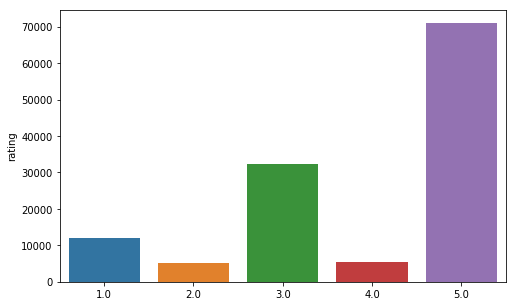

In [15]:
fig = plt.figure(figsize=(8,5))
sns.barplot(x = prod_new['rating'].unique(), y= prod_new['rating'].value_counts())
plt.show()

### Observation : About 70000 products are rated as 5 and about 13000 prodcuts are rated 1.

### Top 10 prodcuts with maximum rating

In [16]:
count = pd.DataFrame(prod_new.groupby(['product_id'])['rating'].sum())
count.sort_values('rating', ascending = False).head(10)

,rating
product_id,
B003ES5ZUU,895.0
B0088CJT4U,869.0
B000N99BBC,797.0
B007WTAJTO,771.0
B00829TIEK,661.0
B00829THK0,605.0
B008DWCRQW,561.0
B004CLYEDC,551.0
B002R5AM7C,528.0


## 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [17]:
train_data, test_data = train_test_split(prod_new, test_size = 0.30, random_state=100)
print(train_data.head(5))

                user_id  product_id  rating  timestramp
5993537   ANW6EGY12V5XS  B007ZW43IQ     4.0  1349049600
4459174  A1QVFHPY8418HC  B004T9Y0MW     5.0  1310774400
2177399   ALDAF4VVLFRHP  B001NOG2T0     4.0  1362787200
232286   A11YIHB6IW352W  B00007KDVI     5.0  1093564800
7811982  A3PD8JD9L4WEII  B00JGSWU7S     5.0  1402444800


In [18]:
print("Training set size : ",train_data.shape)
print("Testing set size : ",test_data.shape)

Training set size :  (88109, 4)
Testing set size :  (37762, 4)


## 4. Build Popularity Recommender model.

In [19]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'product_id')

In [20]:
users = prod_new['user_id'].unique()

### Display recommendation for a user - 20 through popularity model

In [21]:
user_id = users[20]
pm.recommend(user_id)

,user_id,product_id,score,Rank
30914,A341HCMGNZCBIT,B0088CJT4U,136,1.0
8649,A341HCMGNZCBIT,B000N99BBC,123,2.0
19601,A341HCMGNZCBIT,B003ES5ZUU,119,3.0
30326,A341HCMGNZCBIT,B007WTAJTO,117,4.0
31174,A341HCMGNZCBIT,B008DWCRQW,104,5.0
30615,A341HCMGNZCBIT,B00829THK0,92,6.0
30619,A341HCMGNZCBIT,B00829TIEK,92,7.0
17321,A341HCMGNZCBIT,B002R5AM7C,89,8.0
22743,A341HCMGNZCBIT,B004CLYEDC,88,9.0
17505,A341HCMGNZCBIT,B002SZEOLG,82,10.0


### Display recommendation for a user - 5 through popularity model

In [22]:
user_id = users[5]
pm.recommend(user_id)

,user_id,product_id,score,Rank
30914,A3TAS1AG6FMBQW,B0088CJT4U,136,1.0
8649,A3TAS1AG6FMBQW,B000N99BBC,123,2.0
19601,A3TAS1AG6FMBQW,B003ES5ZUU,119,3.0
30326,A3TAS1AG6FMBQW,B007WTAJTO,117,4.0
31174,A3TAS1AG6FMBQW,B008DWCRQW,104,5.0
30615,A3TAS1AG6FMBQW,B00829THK0,92,6.0
30619,A3TAS1AG6FMBQW,B00829TIEK,92,7.0
17321,A3TAS1AG6FMBQW,B002R5AM7C,89,8.0
22743,A3TAS1AG6FMBQW,B004CLYEDC,88,9.0
17505,A3TAS1AG6FMBQW,B002SZEOLG,82,10.0


## 5. Build Collaborative Filtering model.

### Singular Value Decomposition with Surprise package

In [25]:
from surprise import SVD
from surprise import Reader, Dataset, evaluate, GridSearch

from surprise.model_selection import GridSearchCV
from surprise.accuracy import rmse
from surprise.model_selection import train_test_split

In [27]:
reader = Reader(rating_scale=(0.5, 5.0))
prod_coll = Dataset.load_from_df(prod_new[['user_id', 'product_id', 'rating']],reader)

In [28]:
param_grid = {'lr_all': [0.001, 0.003, 0.005, 0.008],'reg_all': [0.08, 0.1, 0.15]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(prod_coll)
algo = gs.best_estimator['rmse']
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9808883811488661
{'lr_all': 0.008, 'reg_all': 0.15}


### Create an item similarity based personalized recommender system

In [38]:
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'product_id')

In [39]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
is_model.recommend(user_id)

----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 124
no. of unique songs in the training set: 38256
Non zero values in cooccurence_matrix :107449


,user_id,product_id,score,rank
0,A3TAS1AG6FMBQW,B008X9Z8NE,0.018875,1
1,A3TAS1AG6FMBQW,B008ULPCB8,0.014934,2
2,A3TAS1AG6FMBQW,B008X9ZBVI,0.014828,3
3,A3TAS1AG6FMBQW,B005QCDY50,0.014820,4
4,A3TAS1AG6FMBQW,B008ULPA2O,0.014797,5
5,A3TAS1AG6FMBQW,B00DQZSAXU,0.014289,6
6,A3TAS1AG6FMBQW,B008ULPE70,0.014240,7
7,A3TAS1AG6FMBQW,B0057UUB1G,0.014141,8
8,A3TAS1AG6FMBQW,B00DQZQHBW,0.013676,9
9,A3TAS1AG6FMBQW,B007VL8Y5E,0.013629,10


### We can also apply the model to find similar product to any product in the dataset

In [41]:
is_model.get_similar_items(['B008X9Z8NE'])

no. of unique songs in the training set: 38256
Non zero values in cooccurence_matrix :1574


,user_id,product_id,score,rank
0,,B008X9Z7N0,0.244444,1
1,,B008ULPE70,0.234043,2
2,,B008X9ZBVI,0.224490,3
3,,B008ULPA2O,0.216216,4
4,,B008ULPAT2,0.204545,5
5,,B008ULPCB8,0.189189,6
6,,B008ULPD0S,0.184211,7
7,,B008X9Z528,0.183673,8
8,,B008MF3X9K,0.162791,9
9,,B005FT3ANA,0.156250,10


### 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

### Caluculate RMSE value for this popularity model

In [29]:
import sklearn.metrics as met
from math import sqrt

pred_df = test_data[['user_id', 'product_id', 'rating']]
pred_df.rename(columns = {'rating' : 'actual_rating'}, inplace=True)
pred_df = pred_df.merge(train_data,left_on='product_id', right_on = 'product_id')
pred_df.rename(columns = {'rating' : 'predicted_rating'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [30]:
RMSE = met.mean_squared_error(pred_df['actual_rating'], pred_df['predicted_rating'])
sqrt(RMSE)

1.2384962775072168

### Observation : The RMSE value for Popularity recommender model is 1.2384962775072168

### Caluculate RMSE value for this collaborative filtering model

In [33]:
train_set, test_set = train_test_split(data_t, test_size=.3)
algo = SVD(lr_all=0.008, reg_all=0.15)

for trainset, testset in data_t.folds(): 
    algo.train(trainset)                             
    predictions_svd = algo.test(testset)
    rmse(predictions_svd,verbose=True)
    

RMSE: 0.9781
RMSE: 0.9759
RMSE: 0.9825
RMSE: 0.9751
RMSE: 0.9818


### Observation : The RMSE value for collaborative filtering model is 0.98

### 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [43]:
def col_top_n(predictions, n=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
         top_n[uid].append((iid, est))
         
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [45]:
from collections import defaultdict

In [46]:
top_k_rec = col_top_n(predictions_svd,5)
top_k_rec.get('A25RTRAPQAJBDJ')

[('B003PL0AME', 4.5980923240213825),
 ('B000JLU2A8', 4.389606011563939),
 ('B00DUTIZJG', 4.350090657666203),
 ('B005DKZTNK', 4.333517713450919),
 ('B000PAS9IU', 4.323857171080602)]

### 8. Summarise your insights.

### Observation : On comparing the two RMSE values of the popularity model and Collaborative filtering model, we can conclude that the RMSE is better for collaborative filtering which is 0.98 when compred to the 1.24 of the popularity model.